# Transformations composition

Since we can think of matrices as we think of transformations, we can apply multiple transformation one after the other and represent them as matrix multiplication. For instance, this is a rotation matrix:

$$
R = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}
$$

And this is a shear matrix:

$$
S = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix}
$$

If we apply to a point $\vec{P_1}$ the rotation $R$ we get a new point $P_R$:

$$
P_R = R * P = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} * \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} -y \\ x \end{pmatrix} 
$$

I f we then apply a the shear $S$, we will have a new point $P_{SR}$:

$$
P_{SR} = S * P_R = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix} * \begin{pmatrix} -y \\ x \end{pmatrix} = \begin{pmatrix} -y + x \\ x \end{pmatrix}
$$

What if we multiply $S$ and $R$ matrix and then apply the composition matrix to the point $P$?


$$
S * R * P = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix} * \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} * P = \begin{pmatrix} 1 & -1 \\ 1 & 0 \end{pmatrix} * \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} x - y \\ x \end{pmatrix} 
$$

Which is exactly what we got previously! If we are intrested in knowing where $\hat{i}$ and $\hat{j}$ land after the two transformations, we can watch, respectively, at the first and second column of the composition matrix. 

Notice that applying a rotation and then a shear is different than applying a shear and then a rotation. In math terms:

$$
P_{SR} \neq P_{RS}
$$

In fact:

$$
S * R \neq R * S
$$

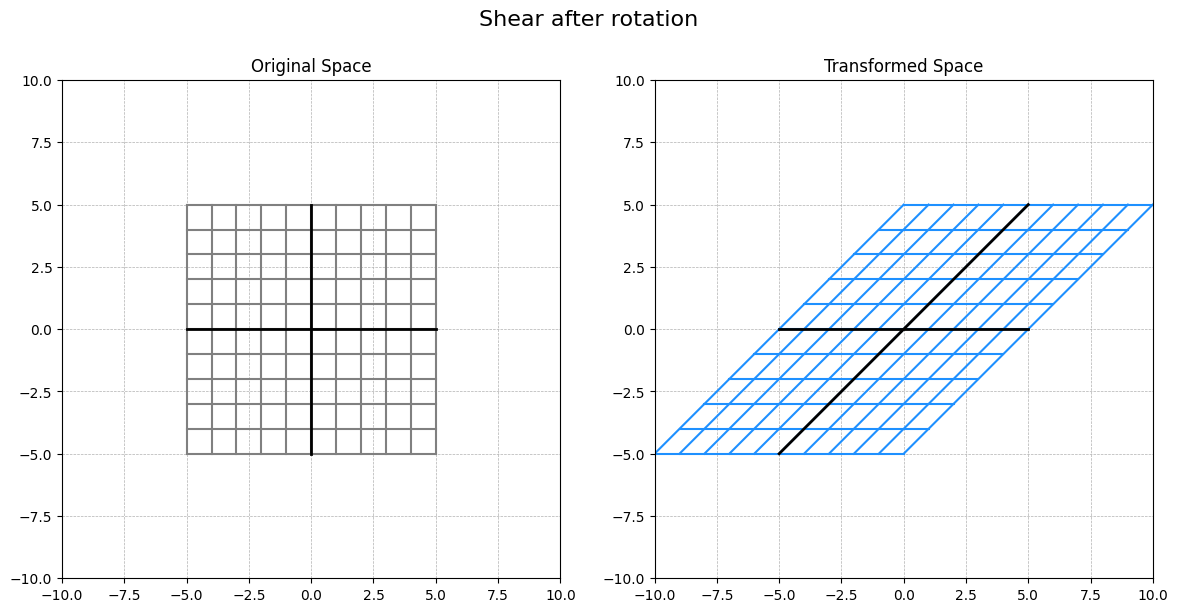

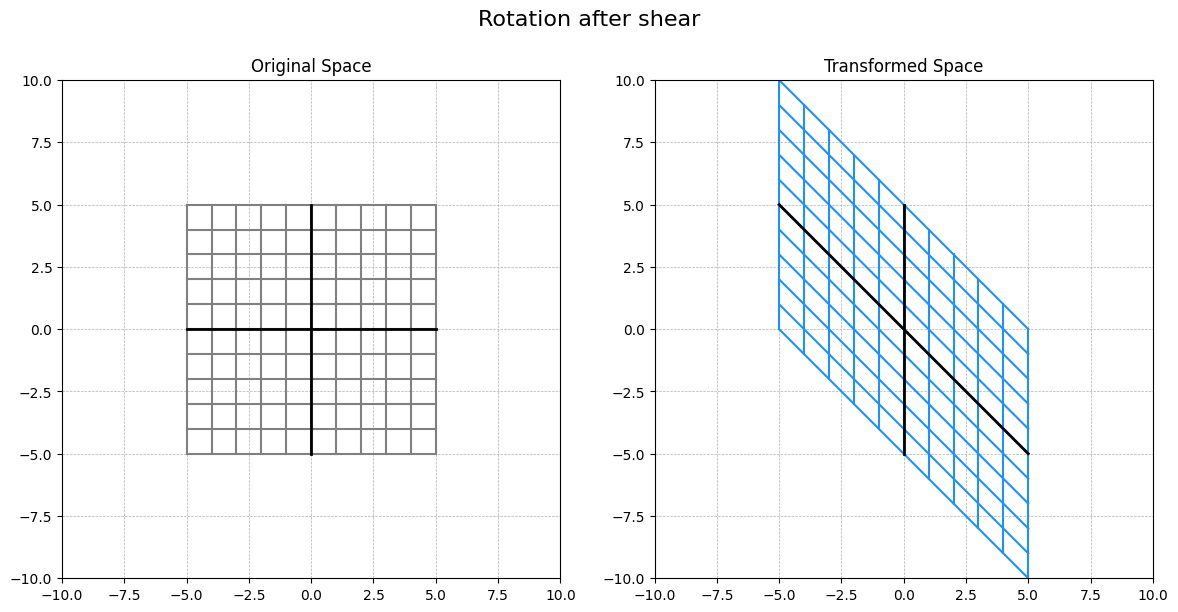

In [ ]:
# Visualization of S * R != R * S

import matplotlib.pyplot as plt
import numpy as np

def plot_grid(ax, grid, color='gray', linestyle='-'):
    for i in range(grid.shape[1]):
        ax.plot(grid[0, i, :], grid[1, i, :], color=color, linestyle=linestyle)
    for i in range(grid.shape[2]):
        ax.plot(grid[0, :, i], grid[1, :, i], color=color, linestyle=linestyle)

def visualize_transformation(transformation_matrix, title):
    x = np.linspace(-5, 5, 11)
    y = np.linspace(-5, 5, 11)
    xx, yy = np.meshgrid(x, y)
    original_grid = np.array([xx, yy])
    points = original_grid.reshape(2, -1)
    transformed_points = transformation_matrix @ points
    transformed_grid = transformed_points.reshape(original_grid.shape)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(title, fontsize=16)
    ax1.set_title("Original Space")
    plot_grid(ax1, original_grid, color='gray')
    ax1.plot([-5, 5], [0, 0], 'k-', lw=2) 
    ax1.plot([0, 0], [-5, 5], 'k-', lw=2) 
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-10, 10)
    ax1.set_aspect('equal', adjustable='box')
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax2.set_title("Transformed Space")
    plot_grid(ax2, transformed_grid, color='dodgerblue')
    transformed_x_axis = transformation_matrix @ np.array([[-5, 5], [0, 0]])
    transformed_y_axis = transformation_matrix @ np.array([[0, 0], [-5, 5]])
    ax2.plot(transformed_x_axis[0], transformed_x_axis[1], 'k-', lw=2)
    ax2.plot(transformed_y_axis[0], transformed_y_axis[1], 'k-', lw=2)
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-10, 10)
    ax2.set_aspect('equal', adjustable='box')
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


shear_matrix = np.array([
    [1, 1],
    [0, 1]
])

rotation_matrix = np.array([
    [0, -1],
    [1,  0]
])

SR = np.matmul(shear_matrix, rotation_matrix)
RS = np.matmul(rotation_matrix, shear_matrix)
visualize_transformation(SR, "Shear after rotation")
visualize_transformation(RS, "Rotation after shear")


## Associative property

Matrix multiplication is associative:

$(AB)C = A(BC)$

Which is trivial to understand if we think matrix as transformatios. In fact, in both cases, we apply $C$ first, then $B$ then $A$. Demontrating it expanding the terms is also trivial. 

Let's visualize it:

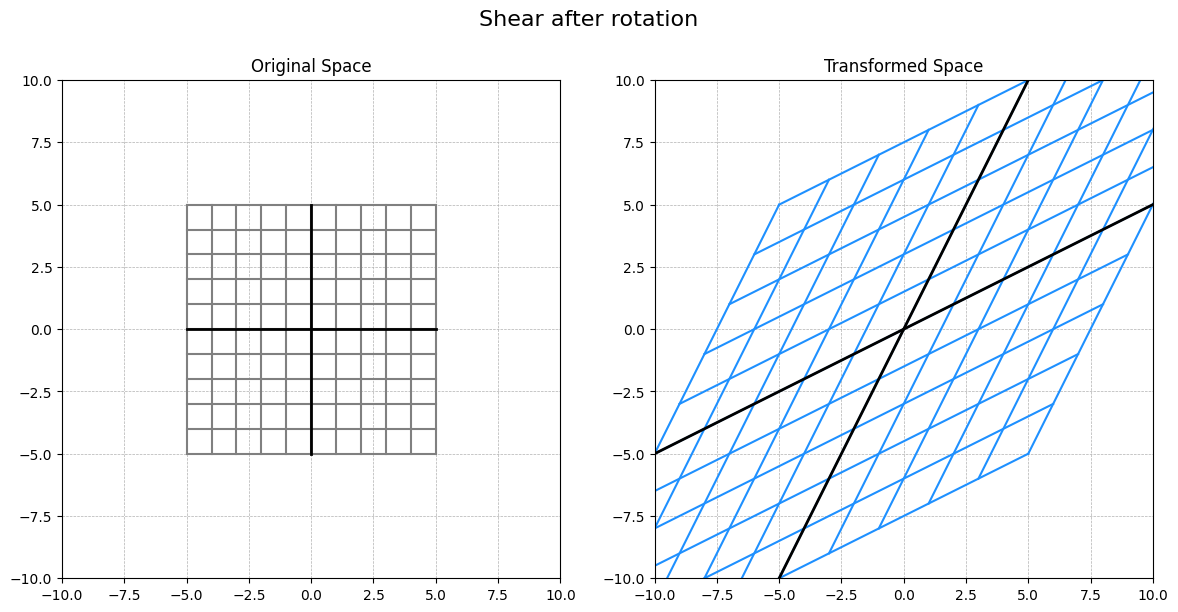

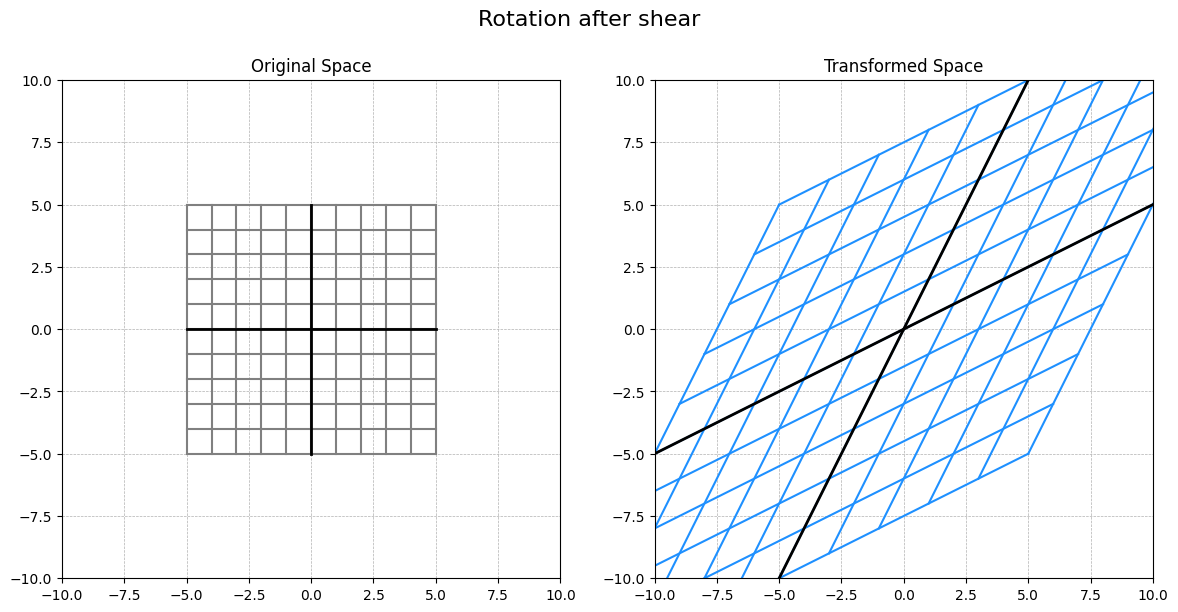

In [3]:
A = np.array([
    [1, 1],
    [0, 1]
])

B = np.array([
    [0, -1],
    [1,  0]
])

C = np.array([
    [-1, 2],
    [1,  1]
])

AB = np.matmul(A, B)
BC = np.matmul(B, C)
visualize_transformation(np.matmul(AB, C), "Shear after rotation")
visualize_transformation(np.matmul(A, BC), "Rotation after shear")